In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

cp-constrictive pericarditis
tresrtbps- resting blood pressure 
chol-cholestrol
fbs- fasting blood sugar 
restecg- Resting electrocardiographic measurement
thalach-maximum heart rate
exang-exercise induced angina
oldpeak- ST depression induced by exercise relative to rest
slope-ST/heart rate slope
ca - Coronary Artery Disease
thal- thalassemia
target-Heart Failure

In [3]:
data = pd.read_csv('dataset.csv')

taking care of missing value

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

for duplicate values

In [5]:
data_dup = data.duplicated().any()

In [6]:
data_dup

True

In [7]:
data = data.drop_duplicates()

In [8]:
data_dup = data.duplicated().any()

In [9]:
data_dup

False

data processing

In [10]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [11]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Encoding Categorical Data

In [13]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


feature scaling

In [16]:
 from sklearn.preprocessing import StandardScaler

In [17]:
st =  StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [18]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


dataset into training set and test set splitting

In [19]:
X = data.drop('target',axis=1)

In [20]:
Y = data['target']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,0.064151,1,0,0.022661,2.061248,0,1,-0.768384,1,0.135360,1,1,3
229,1.060500,1,2,-0.376556,1.209652,0,1,-0.812118,1,0.652812,1,0,3
111,0.285561,1,2,1.049221,-2.332210,1,1,1.024705,0,-0.727060,2,1,3
247,1.281911,1,1,1.619532,-0.009677,0,1,-1.293190,1,-0.899544,1,3,1
60,1.835438,0,2,-1.232023,0.358057,1,0,-0.855851,0,-0.899544,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.378671,1,0,0.478910,0.996754,0,1,-1.205722,1,2.722620,1,3,3
104,-0.489377,1,2,-0.148432,-0.977399,0,1,0.587366,0,-0.899544,2,0,2
300,1.503322,1,0,0.707035,-1.035462,1,1,-0.374779,0,2.032684,1,2,3
194,0.617678,1,2,0.478910,-1.190298,0,0,0.237495,0,1.687716,1,0,2


In [24]:
Y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

logistic regression

In [25]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [28]:
Y_pred1 = log.predict(X_test)

using metrics

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(Y_test,Y_pred1)

0.8360655737704918

using support vector classifer

In [31]:
from sklearn import svm

In [32]:
clif = svm.SVC()

In [33]:
clif.fit(X_train,Y_train)

SVC()

In [34]:
Y_pred2 =  clif.predict(X_test)

In [35]:
accuracy_score(Y_test,Y_pred2)

0.8852459016393442

using kneighbors classifer
 -KNN works by assuming dots which are closer together belong to the same class. If n_neighbors=5 then it assume a dot with the 5 closest dots around it are in the same class.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [39]:
Y_pred3=knn.predict(X_test)

In [40]:
accuracy_score(Y_test,Y_pred3)

0.8688524590163934

In [41]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    score.append(accuracy_score(Y_test,Y_pred))

In [42]:
score

[0.8032786885245902,
 0.8688524590163934,
 0.8852459016393442,
 0.8360655737704918,
 0.8688524590163934,
 0.8524590163934426,
 0.8360655737704918,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.9016393442622951,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8852459016393442,
 0.8852459016393442,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426]

using matplotlib

In [43]:
import matplotlib.pyplot as plt

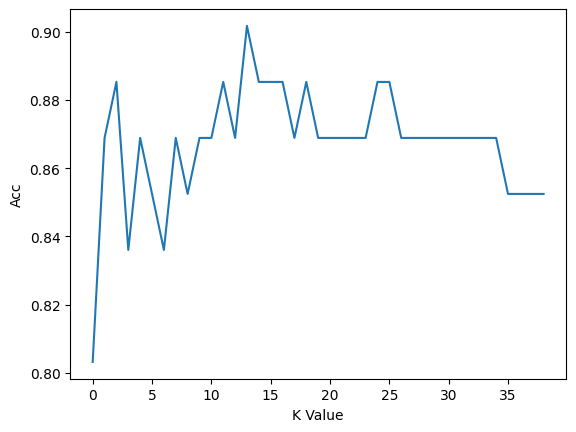

In [44]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

putting value 2 in place of k to check better accuracy

In [45]:
knn=KNeighborsClassifier(n_neighbors=2) 
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8688524590163934

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 35.4 KB


for removing duplicate values after training the set

In [47]:
data = pd.read_csv('dataset.csv')

In [48]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
data = data.drop_duplicates()

In [50]:
data.shape

(302, 14)

In [51]:
X = data.drop('target',axis=1)
Y =  data['target']

In [52]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

decision tree classifer

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier()

In [55]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [56]:
Y_pred4 = dt.predict(X_test)

In [57]:
accuracy_score(Y_test,Y_pred4)

0.7868852459016393

using random forest classifer

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf =  RandomForestClassifier()

In [60]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [61]:
Y_pred5= rf.predict(X_test)

In [62]:
accuracy_score(Y_test,Y_pred5)

0.8688524590163934

using gradient boosting classifer

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
gbc = GradientBoostingClassifier()

In [65]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [66]:
Y_pred6 = gbc.predict(X_test)

In [67]:
accuracy_score(Y_test,Y_pred6)

0.8524590163934426

making dataframe by using pandas FOR accuracy test


In [68]:
import pandas as pd

final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                           'ACC': [accuracy_score(Y_test,Y_pred1),
                                   accuracy_score(Y_test,Y_pred2),
                                   accuracy_score(Y_test,Y_pred3),
                                   accuracy_score(Y_test,Y_pred4),
                                   accuracy_score(Y_test,Y_pred5),
                                   accuracy_score(Y_test,Y_pred6)]})


In [69]:
final_data

,Models,ACC
0,LR,0.836066
1,SVM,0.885246
2,KNN,0.868852
3,DT,0.786885
4,RF,0.868852
5,GB,0.852459


In [70]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


using seaborn

In [71]:
import seaborn as sns

In [72]:
X = data.drop('target',axis=1)
Y = data['target']

In [73]:
X.shape

(302, 13)

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf =  RandomForestClassifier()
rf.fit(X,Y)

RandomForestClassifier()

Heart Disease Frequency per Chest Pain Type

In [76]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


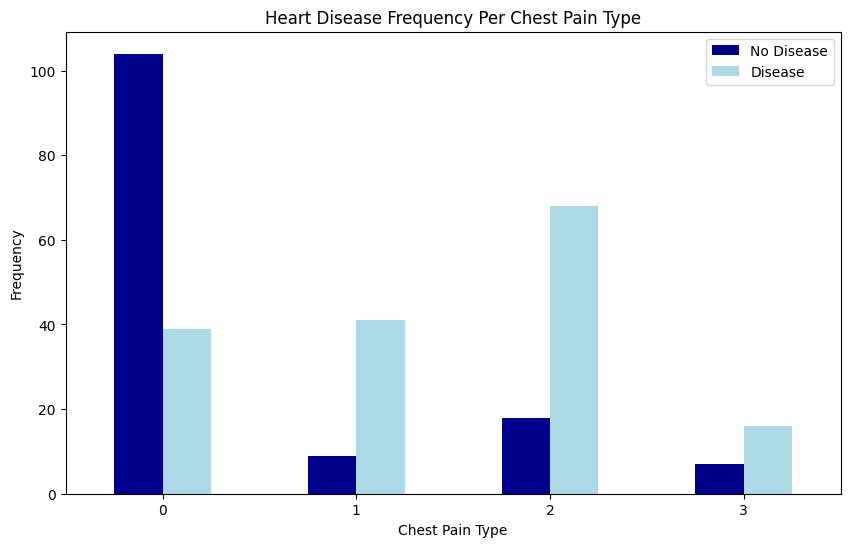

In [77]:
# Create a new crosstab and base plot
pd.crosstab(data.cp, data.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["darkblue", "lightblue"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

Correlation between independent variables 
using df.corr() which will create a correlation matrix for us or a big table of numbers telling us how related each variable is the other.

In [78]:
# Find the correlation between our independent variables
corr_matrix = data.corr()
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


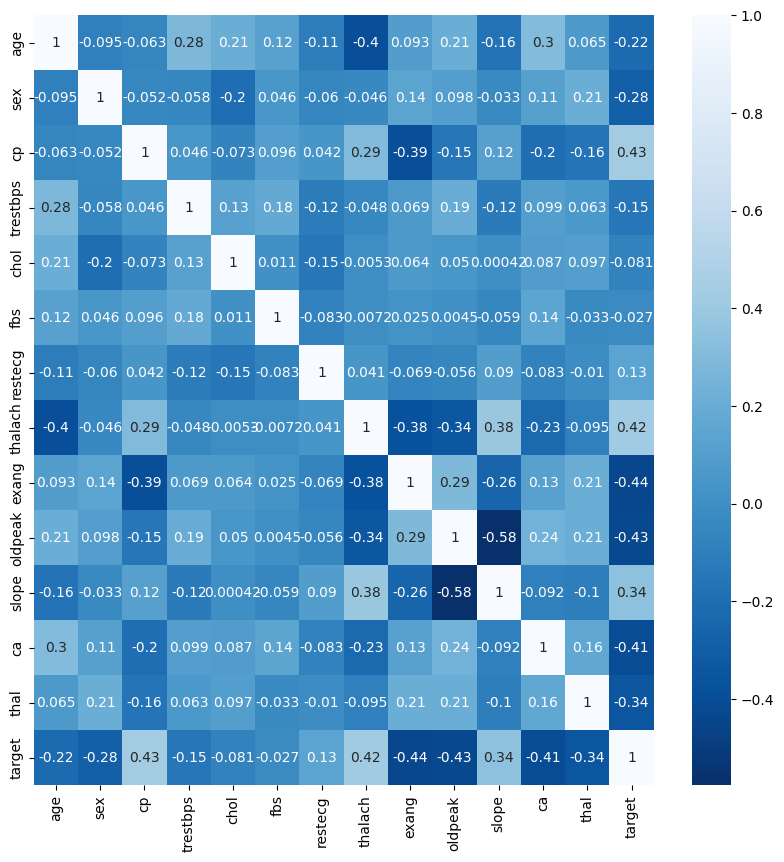

In [79]:

# get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
fig, ax = plt.subplots(figsize=(10,10))
# plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="Blues_r", ax=ax)
plt.show()

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'trestbps'}>],
       [<AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'fbs'}>,
        <AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalach'}>],
       [<AxesSubplot: title={'center': 'exang'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'ca'}>],
       [<AxesSubplot: title={'center': 'thal'}>,
        <AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

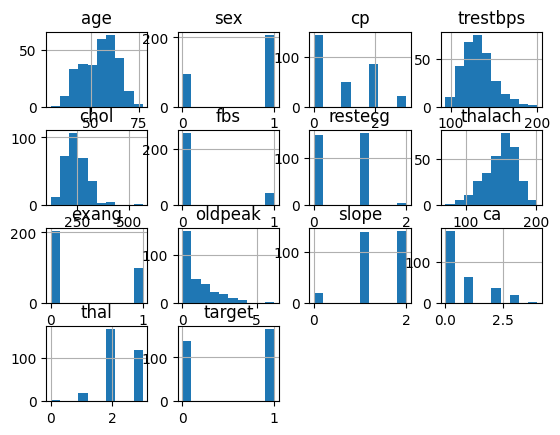

In [80]:
data.hist()

In [81]:
# sns.set_theme(style="darkgrid")

# # Load an example dataset with long-form data
# fmri = sns.load_dataset("fmri")

# # Plot the responses for different events and regions
# sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)

making crosstab

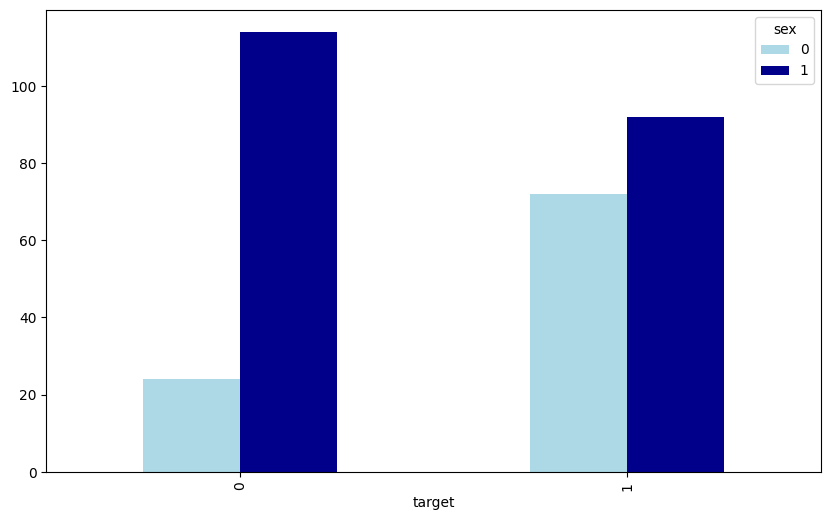

In [82]:
import pandas as pd
pd.crosstab(data.target, data.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["lightblue", "darkblue"]);

Age vs Max Heart rate for Heart Disease

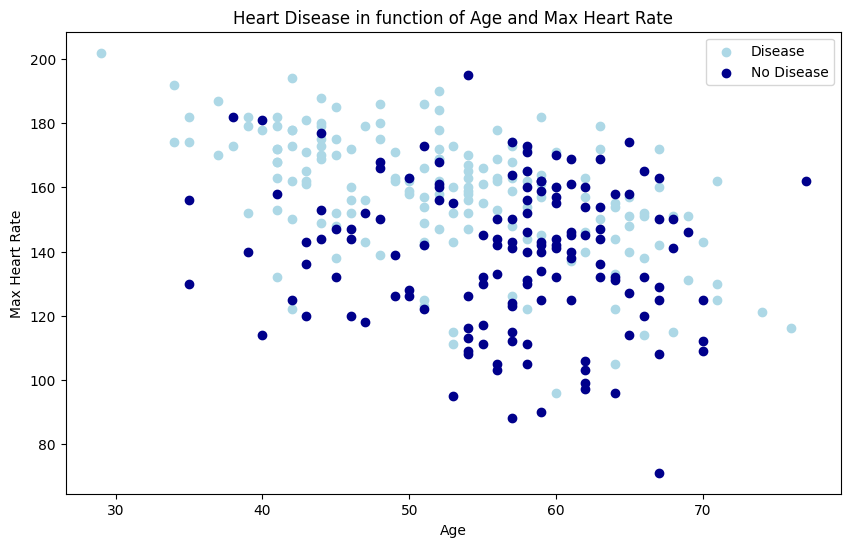

In [83]:
 ##Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(data.age[data.target==1], 
            data.thalach[data.target==1], 
            c="lightblue") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(data.age[data.target==0], 
            data.thalach[data.target==0], 
            c="darkblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

Model Comparison

<AxesSubplot: xlabel='Models', ylabel='ACC'>

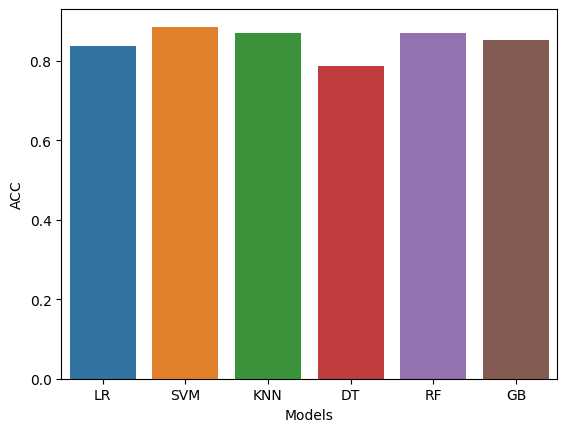

In [84]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

for prediction on new data

In [85]:
import pandas as pd

In [86]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [87]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [88]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Have Disease")

No Disease


saving model using joblib

In [89]:
import joblib

In [90]:
joblib.dump(rf,'model_joblib_heart.pkl')

['model_joblib_heart.pkl']

In [91]:
model = joblib.load('model_joblib_heart')


In [92]:
model.predict(new_data)

array([0], dtype=int64)

In [93]:
data.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [94]:
import pickle
pickle_out= open('Random_Forest_model.pkl','wb')
pickle.dump(rf,pickle_out)
pickle_out.close()

using graphical user interface GUI

In [95]:
from tkinter import *
import joblib

In [96]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\ANSH GUPTA\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\ANSH GUPTA\AppData\Local\Temp\ipykernel_16048\1049222250.py", line 6, in show_entry_fields
    p1=int(e1.get())
       ^^^^^^^^^^^^^
ValueError: invalid literal for int() with base 10: ''
